In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [4]:
ds1 = pd.read_csv(r"./Dataset1.csv")
print("No. of examples and features in the dataset are:", ds1.shape)
ds1.head()

No. of examples and features in the dataset are: (14, 5)


,Outlook,Temp,Humidity,Wind,Play
0,R,H,Normal,F,N
1,R,H,High,T,N
2,O,H,Normal,F,Y
3,S,M,Normal,F,Y
4,S,C,Normal,F,Y


In [5]:
ds1.info()
ds1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Temp      14 non-null     object
 2   Humidity  14 non-null     object
 3   Wind      14 non-null     object
 4   Play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


,Outlook,Temp,Humidity,Wind,Play
count,14,14,14,14,14
unique,3,3,3,2,2
top,R,M,Normal,F,Y
freq,5,6,8,8,9


In [6]:
print("Unique Outlook values: ", ds1['Outlook'].unique())
print("Unique Temperature values: ", ds1['Temp'].unique())
print("Unique Humidity values: ", ds1['Humidity'].unique())
print("Unique Wind values: ", ds1['Wind'].unique())
print("'Play' Class Labels values: ", ds1['Play'].unique())

Unique Outlook values:  ['R' 'O' 'S']
Unique Temperature values:  ['H' 'M' 'C']
Unique Humidity values:  ['Normal' 'High' 'Low']
Unique Wind values:  ['F' 'T']
'Play' Class Labels values:  ['N' 'Y']


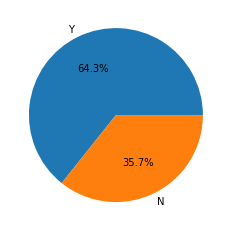

In [7]:
pie_ch = ds1['Play'].value_counts().plot.pie(autopct = "%1.1f%%", radius = 1, startangle = 0)
pie_ch.set_ylabel('')
plt.show()

In [8]:
dummy_ds1 = pd.get_dummies(ds1.iloc[:,:-1])

cols = ds1.columns.tolist()
cols.remove("Play")

ds1 = ds1.drop(cols, axis = 1)
ds1 = pd.concat([dummy_ds1,ds1], axis = 1)

print("\nDataset 1 after concat:\n")
ds1.head()


Dataset 1 after concat:



,Outlook_O,Outlook_R,Outlook_S,Temp_C,Temp_H,Temp_M,Humidity_High,Humidity_Low,Humidity_Normal,Wind_F,Wind_T,Play
0,0,1,0,0,1,0,0,0,1,1,0,N
1,0,1,0,0,1,0,1,0,0,0,1,N
2,1,0,0,0,1,0,0,0,1,1,0,Y
3,0,0,1,0,0,1,0,0,1,1,0,Y
4,0,0,1,1,0,0,0,0,1,1,0,Y


In [9]:
print("\nLabels\n")
labels = ds1['Play']
print(labels)


Labels

0     N
1     N
2     Y
3     Y
4     Y
5     N
6     Y
7     N
8     Y
9     Y
10    Y
11    Y
12    Y
13    N
Name: Play, dtype: object


In [10]:
training_data, testing_data, training_target, testing_target = train_test_split(ds1.iloc[:,:-1], labels, test_size = 0.30, random_state = 21)

In [11]:
gnb = GaussianNB()
gnb.fit(training_data,training_target)

GaussianNB()

In [12]:
# Testing
prediction_target = gnb.predict(testing_data)

# Getting Accuracy
accuracy = accuracy_score(testing_target, prediction_target)
print("Accuracy Score:\n", accuracy)

# Getting Confusion Matrix
cm = confusion_matrix(testing_target, prediction_target)
print("\nConfusion Matrix:\n",cm)

# Getting Precision
precision = precision_score(testing_target, prediction_target, average=None)
print("\nPrecision Score:\n", precision)

# Getting Recall
recall = recall_score(testing_target, prediction_target, average=None)
print("\nRecall Score:\n", recall)

Accuracy Score:
 0.2

Confusion Matrix:
 [[0 4]
 [0 1]]

Precision Score:
 [0.  0.2]

Recall Score:
 [0. 1.]


c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# (1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?
# (2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?
'''
Rainy = 0,1,0
Mild = 0,0,1
Normal = 0,0,1
False = 1,0
'''
case1 = [0,1,0,0,0,1,0,0,1,1,0]

'''
Sunny = 0,0,1
Cool = 1,0,0
High = 1,0,0
True = 0,1
'''
case2 = [0,0,1,1,0,0,1,0,0,0,1]


features = ds1.columns.tolist()
features.remove("Play")
data_frame = pd.DataFrame([case1,case2], columns = features)
data_frame.head()


,Outlook_O,Outlook_R,Outlook_S,Temp_C,Temp_H,Temp_M,Humidity_High,Humidity_Low,Humidity_Normal,Wind_F,Wind_T
0,0,1,0,0,0,1,0,0,1,1,0
1,0,0,1,1,0,0,1,0,0,0,1


In [14]:
pred = gnb.predict(data_frame)
print("Prediction on whether play or not:\ncase1: {}\tcase2: {}".format(pred[0],pred[1]))

Prediction on whether play or not:
case1: Y	case2: Y
